In [1]:
import numpy as np 
import pandas as pd 
from fbprophet import Prophet

# Load Dataset
kospi (2018-01-01 - 2020-09-18)

In [2]:
df = pd.read_csv('C:/Users/user/kospi_label_2.csv')

df.head()

,date,kospi_close,kospi_dividend_yield_ratio,kospi_per,kospi_pbr,kospi_open,kospi_high,kospi_low,kospi_volume,kospi_value,kospi_stock_value,kospi_label
0,20180103,1.632235,-1.788910,-0.250692,1.660345,1.611714,1.621215,1.657352,-0.874472,-0.367659,1.310986,1.0
1,20180104,1.524383,-1.756146,-0.270786,1.569781,1.708315,1.671174,1.574656,-0.863260,-0.105929,1.205555,2.0
2,20180105,1.692803,-1.821675,-0.238635,1.660345,1.569657,1.643834,1.623118,-0.965789,-0.278721,1.371801,1.0
3,20180108,1.778260,-1.821675,-0.222560,1.750909,1.752643,1.741829,1.722984,-0.954913,-0.252637,1.453100,1.0
4,20180109,1.761722,-1.821675,-0.226579,1.750909,1.752805,1.793215,1.745610,-0.697653,0.028191,1.430629,2.0


In [3]:
df.describe()

,date,kospi_close,kospi_dividend_yield_ratio,kospi_per,kospi_pbr,kospi_open,kospi_high,kospi_low,kospi_volume,kospi_value,kospi_stock_value,kospi_label
count,6.690000e+02,6.690000e+02,6.690000e+02,6.690000e+02,6.690000e+02,6.690000e+02,6.690000e+02,6.690000e+02,6.690000e+02,6.690000e+02,6.690000e+02,669.000000
mean,2.018968e+07,-1.274516e-16,-4.248387e-16,-5.522903e-16,2.549032e-16,1.147065e-15,1.401968e-15,1.104581e-15,-8.496774e-17,6.372581e-17,-9.346452e-16,1.448430
std,7.847796e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.500704
min,2.018010e+07,-3.945861e+00,-1.985496e+00,-1.000198e+00,-3.139561e+00,-3.849106e+00,-3.740531e+00,-3.918861e+00,-1.384120e+00,-1.291794e+00,-3.956849e+00,0.000000
25%,2.018091e+07,-6.010966e-01,-6.093961e-01,-7.088349e-01,-6.037618e-01,-6.164985e-01,-6.126946e-01,-5.919514e-01,-7.246741e-01,-6.896774e-01,-6.137332e-01,1.000000
50%,2.019052e+07,-9.247378e-02,1.312530e-02,-3.210205e-01,-2.415047e-01,-8.289305e-02,-9.098604e-02,-9.026981e-02,-2.973491e-01,-3.538472e-01,-1.076246e-01,1.000000
75%,2.020012e+07,6.418842e-01,7.667038e-01,3.300253e-01,7.547023e-01,6.469426e-01,6.396146e-01,6.422206e-01,4.989642e-01,3.338610e-01,6.996868e-01,2.000000
max,2.020092e+07,2.238678e+00,3.715489e+00,2.984444e+00,2.113166e+00,2.183538e+00,2.245421e+00,2.222419e+00,5.887266e+00,3.714550e+00,1.901050e+00,2.000000


# Types

# Preprocess

In [4]:
df.date = df.date.astype(str)
df.date = df.date.str[:4] + '-' + df.date.str[4:6] + '-' + df.date.str[6:]
df['date'] = pd.to_datetime(df['date'])

data = df[['date', 'kospi_close']].reset_index(drop=True)

data = data.rename(columns={'date': 'ds', 'kospi_close': 'y'})

data.head()

,ds,y
0,2018-01-03,1.632235
1,2018-01-04,1.524383
2,2018-01-05,1.692803
3,2018-01-08,1.778260
4,2018-01-09,1.761722


<AxesSubplot:xlabel='ds'>

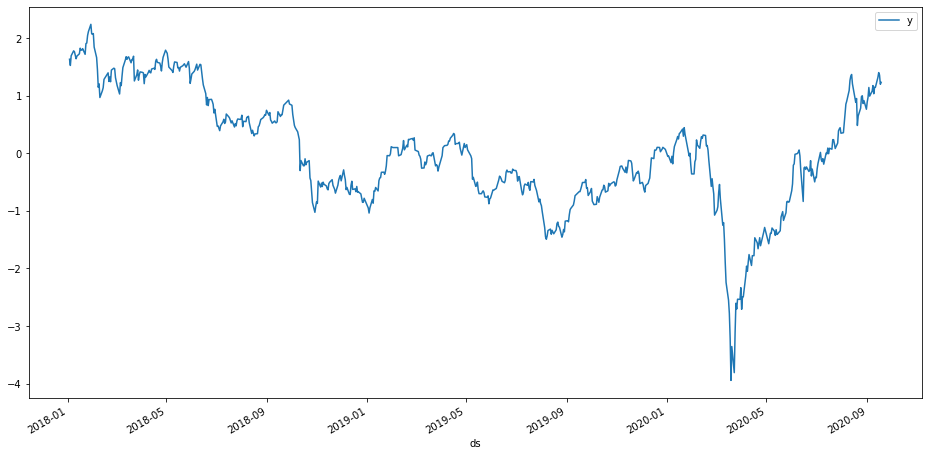

In [5]:
data.plot(x='ds', y='y', figsize=(16, 8))

# Fit

https://facebook.github.io/prophet/docs/quick_start.html

In [ ]:
"""
Init signature:
Prophet(
    growth='linear',
    changepoints=None,
    n_changepoints=25,
    changepoint_range=0.8,
    yearly_seasonality='auto',
    weekly_seasonality='auto',
    daily_seasonality='auto',
    holidays=None,
    seasonality_mode='additive',
    seasonality_prior_scale=10.0,
    holidays_prior_scale=10.0,
    changepoint_prior_scale=0.05,
    mcmc_samples=0,
    interval_width=0.8,
    uncertainty_samples=1000,
    stan_backend=None,
)
Docstring:     
Prophet forecaster.

Parameters
----------
growth: String 'linear' or 'logistic' to specify a linear or logistic
    trend.
changepoints: List of dates at which to include potential changepoints. If
    not specified, potential changepoints are selected automatically.
n_changepoints: Number of potential changepoints to include. Not used
    if input `changepoints` is supplied. If `changepoints` is not supplied,
    then n_changepoints potential changepoints are selected uniformly from
    the first `changepoint_range` proportion of the history.
changepoint_range: Proportion of history in which trend changepoints will
    be estimated. Defaults to 0.8 for the first 80%. Not used if
    `changepoints` is specified.
yearly_seasonality: Fit yearly seasonality.
    Can be 'auto', True, False, or a number of Fourier terms to generate.
weekly_seasonality: Fit weekly seasonality.
    Can be 'auto', True, False, or a number of Fourier terms to generate.
daily_seasonality: Fit daily seasonality.
    Can be 'auto', True, False, or a number of Fourier terms to generate.
holidays: pd.DataFrame with columns holiday (string) and ds (date type)
    and optionally columns lower_window and upper_window which specify a
    range of days around the date to be included as holidays.
    lower_window=-2 will include 2 days prior to the date as holidays. Also
    optionally can have a column prior_scale specifying the prior scale for
    that holiday.
seasonality_mode: 'additive' (default) or 'multiplicative'.
seasonality_prior_scale: Parameter modulating the strength of the
    seasonality model. Larger values allow the model to fit larger seasonal
    fluctuations, smaller values dampen the seasonality. Can be specified
    for individual seasonalities using add_seasonality.
holidays_prior_scale: Parameter modulating the strength of the holiday
    components model, unless overridden in the holidays input.
changepoint_prior_scale: Parameter modulating the flexibility of the
    automatic changepoint selection. Large values will allow many
    changepoints, small values will allow few changepoints.
mcmc_samples: Integer, if greater than 0, will do full Bayesian inference
    with the specified number of MCMC samples. If 0, will do MAP
    estimation.
interval_width: Float, width of the uncertainty intervals provided
    for the forecast. If mcmc_samples=0, this will be only the uncertainty
    in the trend using the MAP estimate of the extrapolated generative
    model. If mcmc.samples>0, this will be integrated over all model
    parameters, which will include uncertainty in seasonality.
uncertainty_samples: Number of simulated draws used to estimate
    uncertainty intervals. Settings this value to 0 or False will disable
    uncertainty estimation and speed up the calculation.
    uncertainty intervals.
stan_backend: str as defined in StanBackendEnum default: None - will try to
    iterate over all available backends and find the working one
File:           c:\programdata\anaconda3\lib\site-packages\fbprophet\forecaster.py
Type:           type
Subclasses:     
"""

In [17]:
# 원/달러 환율 등락률 1.5% 이상인 구간
cp_1=['2018-02-02','2018-02-15','2018-03-06','2018-06-15','2020-03-12','2020-03-18']
# 원/달러 환율 등락률 1.0% 이상인 구간
cp_2=['2018-02-02','2018-02-15','2018-03-06','2018-06-15','2020-03-12','2020-03-18',
   '2018-05-10','2018-06-29','2018-08-02','2018-08-16','2018-11-01','2018-11-09',
   '2019-04-24','2019-05-09','2019-05-13','2019-06-20','2019-08-02','2019-08-05',
   '2020-02-20','2020-02-24','2020-03-16','2020-03-17','2020-03-24','2020-04-01',
   '2020-04-07','2020-04-21','2020-05-01']

# 미국 정유가격 등락률 20% 이상인 구간
cp_3=['2020-03-08','2020-03-18','2020-03-19','2020-04-02','2020-04-20','2020-04-21',
   '2020-04-22','2020-04-27','2020-04-29','2020-04-30','2020-05-05']
# 미국 정유가격 등락률 10% 이상인 구간
cp_4=['2020-03-08','2020-03-18','2020-03-19','2020-04-02','2020-04-20','2020-04-21',
   '2020-04-22','2020-04-27','2020-04-29','2020-04-30','2020-05-05',
   '2019-09-16','2020-03-06','2020-03-10','2020-03-20','2020-04-03',
   '2020-04-14','2020-04-23']

# 미국 국채 (13주) 등락률 90% 이상인 구간
cp_5=['2020-03-18','2020-03-19','2020-03-25','2020-03-30','2020-03-31','2020-04-01',
     '2020-04-07']

# 한국 기준금리 등락률 0% 아닌 구간
cp_6=['2018-11-30','2019-07-18','2019-10-16','2020-03-17','2020-05-28']

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

prop_model = Prophet(
    growth='linear',
    changepoints=cp_1,
    #n_changepoints=25,
    changepoint_range=0.8,
    yearly_seasonality='auto',
    weekly_seasonality='auto',
    daily_seasonality='auto',
    holidays=None,
    seasonality_mode='additive',
    seasonality_prior_scale=10.0,
    holidays_prior_scale=10.0,
    changepoint_prior_scale=0.05,
    mcmc_samples=0,
    interval_width=0.8,
    uncertainty_samples=1000,
    stan_backend=None,
)

model = prop_model
# model = Prophet()
model.add_country_holidays(country_name='KR')
model.fit(data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# Predict

In [18]:
!pip install workalendar
from workalendar.asia import SouthKorea
kor_holidays = pd.concat([pd.Series(np.array(SouthKorea().holidays(2020))[:, 0]), pd.Series(np.array(SouthKorea().holidays(2021))[:, 0])]).reset_index(drop=True)

future = model.make_future_dataframe(periods=365)
future = future[future.ds.dt.weekday != 5]
future = future[future.ds.dt.weekday != 6]
for kor_holiday in kor_holidays:
    future = future[future.ds != kor_holiday]
    
future.tail()

,ds
1028,2021-09-13
1029,2021-09-14
1030,2021-09-15
1031,2021-09-16
1032,2021-09-17


In [19]:
forecast = model.predict(future)

forecast.tail(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Alternative holiday of Children's Day,Alternative holiday of Children's Day_lower,Alternative holiday of Children's Day_upper,Alternative holiday of Chuseok,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
919,2021-09-06,4.158574,2.981793,5.691706,3.180042,5.403817,0.0,0.0,0.0,0.0,...,-0.042654,-0.042654,-0.042654,0.105363,0.105363,0.105363,0.0,0.0,0.0,4.221283
920,2021-09-07,4.168434,3.004380,5.756123,3.185550,5.417509,0.0,0.0,0.0,0.0,...,-0.003326,-0.003326,-0.003326,0.122064,0.122064,0.122064,0.0,0.0,0.0,4.287171
921,2021-09-08,4.178294,3.022496,5.739324,3.190813,5.434541,0.0,0.0,0.0,0.0,...,-0.025052,-0.025052,-0.025052,0.138597,0.138597,0.138597,0.0,0.0,0.0,4.291839
922,2021-09-09,4.188153,3.093327,5.830195,3.196193,5.455001,0.0,0.0,0.0,0.0,...,-0.005908,-0.005908,-0.005908,0.154839,0.154839,0.154839,0.0,0.0,0.0,4.337084
923,2021-09-10,4.198013,3.076195,5.827844,3.201708,5.472983,0.0,0.0,0.0,0.0,...,-0.016009,-0.016009,-0.016009,0.170656,0.170656,0.170656,0.0,0.0,0.0,4.352660
924,2021-09-13,4.227592,3.018060,5.895186,3.217812,5.504692,0.0,0.0,0.0,0.0,...,-0.042654,-0.042654,-0.042654,0.214093,0.214093,0.214093,0.0,0.0,0.0,4.399031
925,2021-09-14,4.237452,3.219052,5.894321,3.220485,5.520643,0.0,0.0,0.0,0.0,...,-0.003326,-0.003326,-0.003326,0.226701,0.226701,0.226701,0.0,0.0,0.0,4.460826
926,2021-09-15,4.247312,3.071622,5.943301,3.219616,5.536593,0.0,0.0,0.0,0.0,...,-0.025052,-0.025052,-0.025052,0.238090,0.238090,0.238090,0.0,0.0,0.0,4.460349
927,2021-09-16,4.257171,3.067635,5.884850,3.222259,5.552543,0.0,0.0,0.0,0.0,...,-0.005908,-0.005908,-0.005908,0.248083,0.248083,0.248083,0.0,0.0,0.0,4.499345
928,2021-09-17,4.267031,3.269275,5.909803,3.226897,5.567737,0.0,0.0,0.0,0.0,...,-0.016009,-0.016009,-0.016009,0.256501,0.256501,0.256501,0.0,0.0,0.0,4.507523


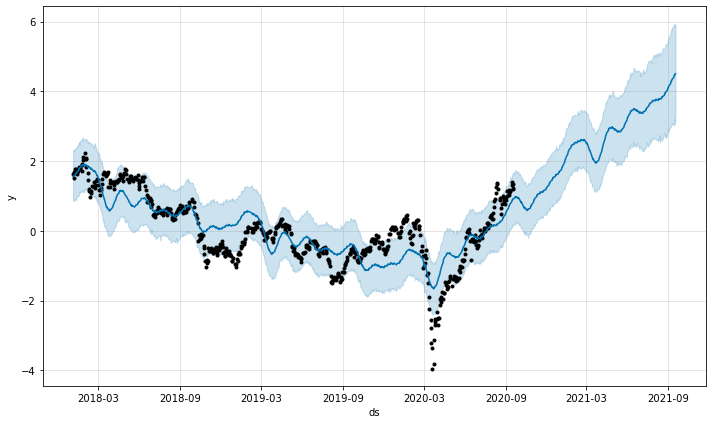

In [20]:
fig1 = model.plot(forecast)

# Components

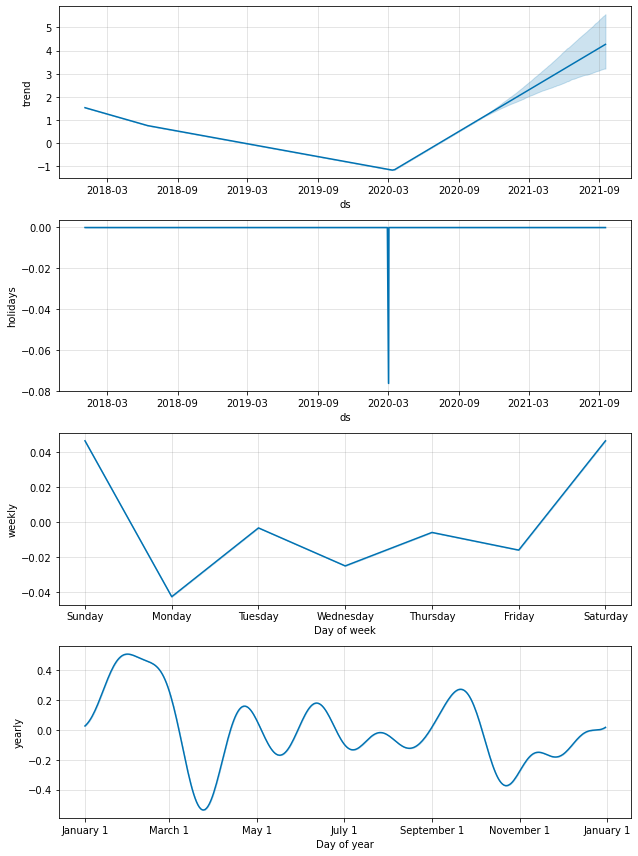

In [21]:
fig2 = model.plot_components(forecast)

In [22]:
from fbprophet.diagnostics import cross_validation
df.shape

(669, 12)

# Cross Validation

- For measuring forecast error by comparing the predicted values with the actual values
- initial:the size of the initial training period
- period : the spacing between cutoff dates
- horizon : the forecast horizon((ds minus cutoff)
- By default, the initial training period is set to three times the horizon, and cutoffs are made every half a horizon

In [23]:
cv = cross_validation(model,initial='534 days', period='20 days', horizon = '134 days')

cv.head()

INFO:fbprophet:Making 17 forecasts with cutoffs between 2019-06-22 00:00:00 and 2020-05-07 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-06-24,-0.771041,-1.030787,-0.518467,-0.319944,2019-06-22
1,2019-06-25,-0.821434,-1.074516,-0.552318,-0.345375,2019-06-22
2,2019-06-26,-0.865820,-1.128587,-0.584888,-0.344237,2019-06-22
3,2019-06-27,-0.909304,-1.179595,-0.656197,-0.276619,2019-06-22
4,2019-06-28,-0.951171,-1.212120,-0.682931,-0.296682,2019-06-22


# Performance Metrics

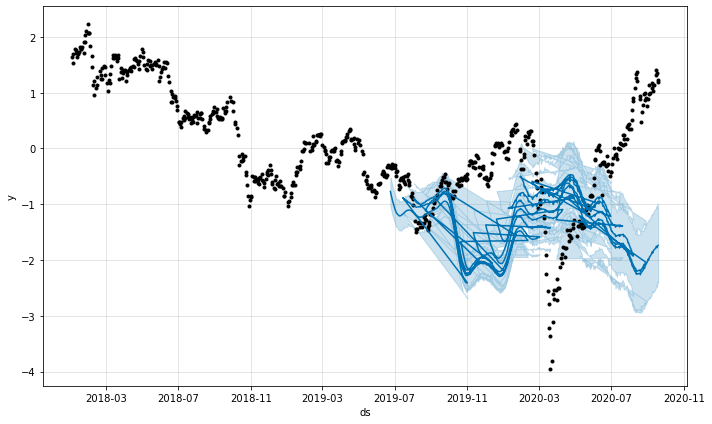

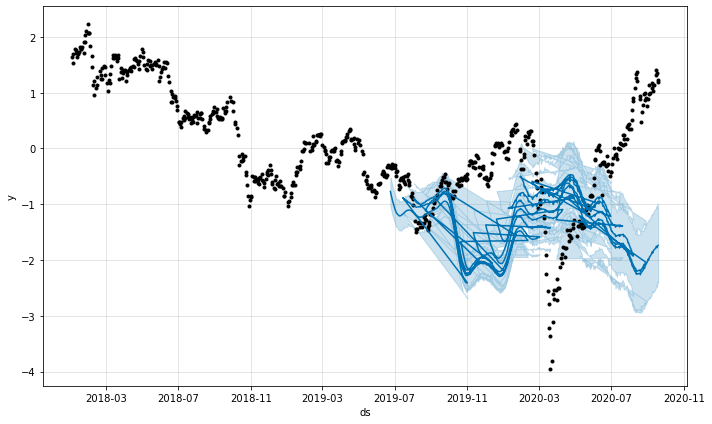

In [24]:
model.plot(cv)

In [25]:
from fbprophet.diagnostics import performance_metrics
df_pm = performance_metrics(cv)
df_pm

,horizon,mse,rmse,mae,mape,mdape,coverage
0,14 days,1.006286,1.003138,0.817524,8.697047,0.744295,0.280401
1,15 days,1.092471,1.045213,0.844737,3.158623,0.726358,0.270130
2,16 days,1.154893,1.074660,0.864431,3.137576,0.726358,0.271429
3,17 days,1.206867,1.098575,0.883013,3.215837,0.744295,0.280220
4,18 days,1.256785,1.121064,0.897798,3.311866,0.732155,0.289211
...,...,...,...,...,...,...,...
116,130 days,2.954393,1.718835,1.516345,46.567169,3.131855,0.123377
117,131 days,2.956117,1.719336,1.514604,46.361412,3.131855,0.129870
118,132 days,2.973633,1.724422,1.523998,46.849335,3.178156,0.122196
119,133 days,3.011802,1.735454,1.533300,46.327895,3.222044,0.116883


# Visualizing Performance Metrics
- cutoff: how far into the future the prediction was

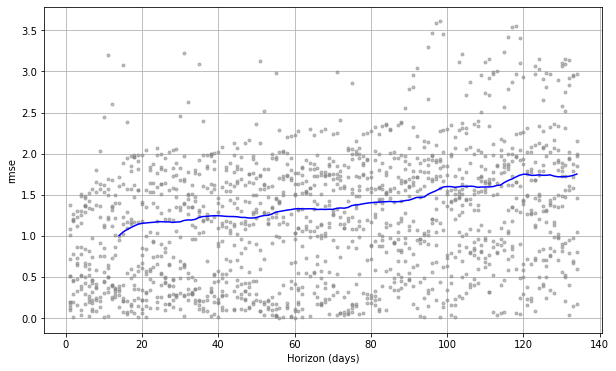

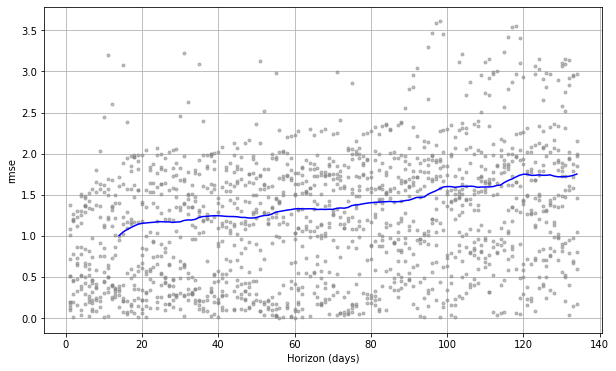

In [26]:
from fbprophet.plot import plot_cross_validation_metric

plot_cross_validation_metric(cv,metric='rmse')